In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [15]:
# 載入 MNIST 資料集
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 資料預處理
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # 正規化
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)  # One-hot 編碼
y_test = to_categorical(y_test, 10)


In [16]:
from tensorflow.keras import regularizers

# 定義 Dense NN 模型
dense_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),  # 添加 Dropout
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),  # 添加 Dropout
    layers.Dense(10, activation='softmax')
])

# 編譯模型
dense_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
dense_history = dense_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7171 - loss: 1.0710 - val_accuracy: 0.9431 - val_loss: 0.3729
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8979 - loss: 0.5288 - val_accuracy: 0.9528 - val_loss: 0.3160
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9134 - loss: 0.4626 - val_accuracy: 0.9546 - val_loss: 0.3050
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9163 - loss: 0.4425 - val_accuracy: 0.9567 - val_loss: 0.2882
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9216 - loss: 0.4256 - val_accuracy: 0.9573 - val_loss: 0.2790
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9197 - loss: 0.4222 - val_accuracy: 0.9554 - val_loss: 0.2826
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9248 - loss: 0.4070 - val_accuracy: 0.9600 - val_loss: 0.2760
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9249 - loss: 0.4049 -

In [17]:
# 定義 CNN 模型
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # 添加 Dropout
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # 添加 Dropout
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),  # 添加 Dropout
    layers.Dense(10, activation='softmax')
])

# 編譯模型
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
cnn_history = cnn_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - accuracy: 0.7975 - loss: 0.7942 - val_accuracy: 0.9775 - val_loss: 0.2174
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9612 - loss: 0.2805 - val_accuracy: 0.9861 - val_loss: 0.1772
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9683 - loss: 0.2376 - val_accuracy: 0.9863 - val_loss: 0.1591
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9705 - loss: 0.2192 - val_accuracy: 0.9869 - val_loss: 0.1563
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9720 - loss: 0.2108 - val_accuracy: 0.9888 - val_loss: 0.1449
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 35ms/step - accuracy: 0.9736 - loss: 0.2027 - val_accuracy: 0.9885 - val_loss: 0.1502
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - accuracy: 0.9771 - loss: 0.1938 - val_accuracy: 0.9868 - val_loss: 0.1441
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.9742 -

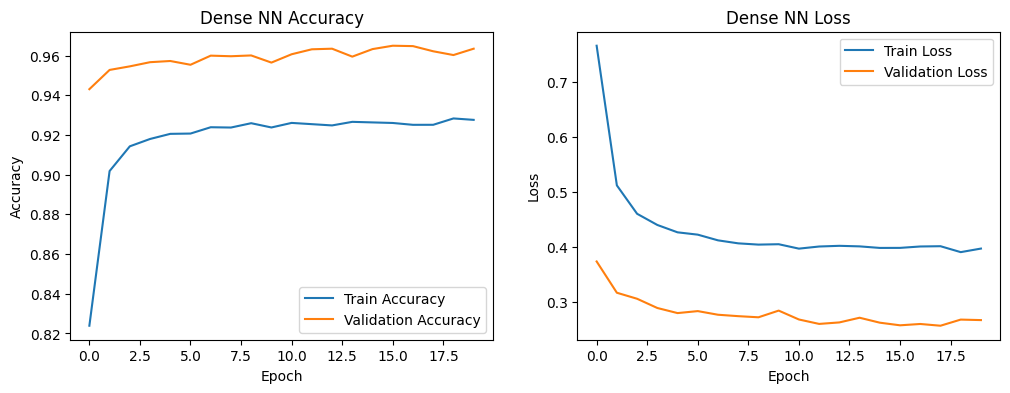

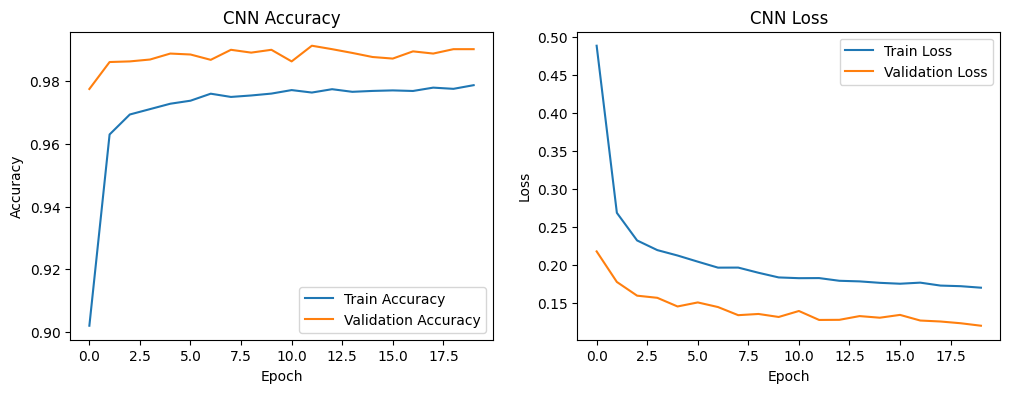

In [18]:
import matplotlib.pyplot as plt

# 畫圖函數
def plot_history(history, title):
    plt.figure(figsize=(12, 4))

    # 準確率
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # 損失
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# 繪製 Dense NN 和 CNN 的訓練歷史
plot_history(dense_history, 'Dense NN')
plot_history(cnn_history, 'CNN')


In [19]:
# Dense NN 評估
dense_test_loss, dense_test_acc = dense_model.evaluate(X_test, y_test, verbose=2)
print(f"Dense NN Test Accuracy: {dense_test_acc:.2f}")

# CNN 評估
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test, y_test, verbose=2)
print(f"CNN Test Accuracy: {cnn_test_acc:.2f}")


313/313 - 0s - 1ms/step - accuracy: 0.9635 - loss: 0.2662
Dense NN Test Accuracy: 0.96
313/313 - 2s - 8ms/step - accuracy: 0.9902 - loss: 0.1195
CNN Test Accuracy: 0.99
